# Natural Language Processing and Topic Classification

## Goals and Objectives:

### _Predict the topic of articles in 2015 - 2016 from articles from 1999 to 2014._

The challenge: We have acquired news articles containing potentially relevant information. Using these, we need you to use historical reports to determine the topics for new articles so that they can be classified and prioritised. This will allow analysts to focus on only the most pertinent details of this developing crisis.

For Further Information: https://www.datasciencechallenge.org/challenges/2/growing-instability/

The [official guide](guide.pdf) is also available in this project's directory.

## Creating the Full Data Frame with Topics Classified:

From the preliminary EDA, code was adjusted to create our data frame using a custom lambda function to map topic articles to 1s and 0s, this minor adjustment saved hours.

In [2]:
# IMPORTS
import pandas as pd
import os
import time

In [3]:
# DEFINE DIRECTORY PATH
path_to_json = 'TrainingData2014/'

# CREATE LIST OF FILES FROM THE DIRECTORY
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

# DEFINE PANDAS DATAFRAME
df = pd.DataFrame()

# LOOP THROUGH FILES, READ IN JSON AND BUILD DATAFRAME
for index, js in enumerate(json_files):
    json_data = pd.read_json(os.path.join(path_to_json, js), 'r')
    df = df.append(json_data)
    
# LOOK AT TOPIC DICTIONARY AND GET A TOPIC COUNT
topic_file = open('./topicDictionary.txt', 'r')
topics = topic_file.read().split('\r\n')

# SPLITTING THE ELEMENTS OF THE JSON INTO TEXT, PUBLICATION DATE AND TOPICS
df['text'] = df.TrainingData.apply(lambda x: x['bodyText'])
df['pubdate'] = df.TrainingData.apply(lambda x: x['webPublicationDate'])
df['topics'] = df.TrainingData.apply(lambda x: x['topics'])

# DROP FIRST TWO COLUMNS
df.reset_index(inplace=True, drop=True)
df.drop('TrainingData', axis=1, inplace=True)

# DEFINE FUNCTION TO CREATE OUR DATAFRAME
def topic_col(x):
    a = 0
    for elem in x:
        if elem == topic:
            a = 1
    return a

# RUN TOPIC COL FUNCTION ON ALL DATA
time1 = time.time()
for topic in topics:
    df[topic] = df['topics'].map(topic_col)
time2 = time.time()
time_in_s = (time2-time1)
print 'Function takes around %0.3f seconds to run' % (time_in_s)

Function takes around 18.108 seconds to run


In [9]:
df.head()

,text,pubdate,topics,activism,afghanistan,aid,algerianhostagecrisis,alqaida,alshabaab,antiwar,...,unitednations,usguncontrol,values,warcrimes,warreporting,weaponstechnology,womeninbusiness,woolwichattack,worldmigration,zikavirus
0,In 10 years' time social media will have been ...,06-02-2014,"[society, voluntarysectornetwork, media]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.50am Dettori manager says jockey’s focus wi...,12-06-2014,[sport],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The number of people participating in sport on...,12-06-2014,[sport],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amélie Mauresmo will encourage Andy Murray to ...,12-06-2014,[sport],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anniversaries are strange things. They are mea...,24-01-2014,"[artanddesign, culture, film]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Big Data and Sampling Issues:

Due to the size of the data that was available, 1.6 million articles, running models on this data took excessively long time. Measures were taken to avoid excessively long computing times and in addition ensuring that the training data would be sufficient to predict unseen articles about topics accurately.

After running models trained on data from 1999 to 2014, I found that training the models simply on 2014 data lead to the same results, as a whole most topics did not benefit from the addition of older training data rather caused a negative impact towards it.

Function takes around 12.997 seconds to run


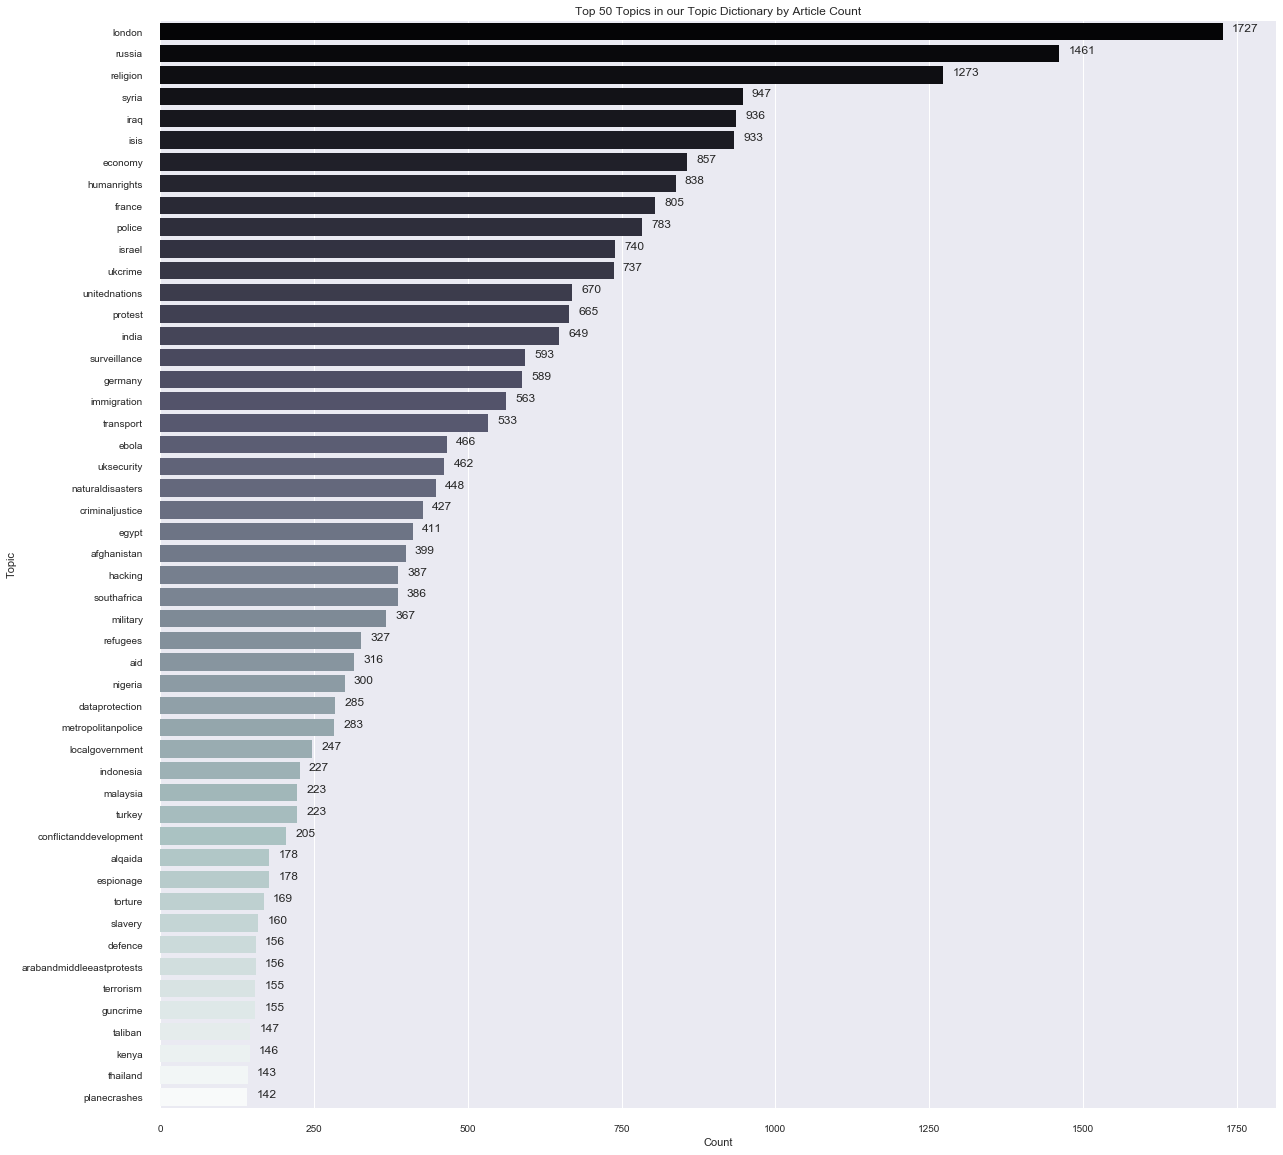

In [6]:
# IMPORTS
import seaborn as sns
import matplotlib.pyplot as plt

# SET UP A NEW DATAFRAME FROM OUR TOPIC DICTIONARY
topicdf = pd.DataFrame(topics, columns=['topic'])

# TIME HOW LONG IT TAKES TO LOOP THROUGH 1.6 MILLION ROWS OF LISTS OF TOPICS
time1 = time.time()

# ADD THE COUNT FOR EACH TOPIC TO OUR TOPIC DICTIONARY DATAFRAME
for x in topics:
    counter = 0
    for list in df['topics']:
        for y in list:
            if y == x:
                counter += 1
    topicdf.loc[topicdf['topic'] == x, 'count'] = int(counter)  
    topicdf.loc[topicdf['topic'] == x, 'ratio'] = round(float(counter)/df.shape[0],2)

time2 = time.time()
time_in_s = (time2-time1)
print 'Function takes around %0.3f seconds to run' % (time_in_s)

# SORT OUR TOPIC DICTIONARY DATA FRAME BY COUNT
topicdf = topicdf.sort_values('count', ascending=False)

# CALCULATE % OF TOTAL TRAINING DATA
topicdf['pct'] = (topicdf['count']/float(df.shape[0]))*100

# RESET INDEX AND PRINT TOP 10 ARTICLES BY COUNT
topicdf.reset_index(drop=True, inplace=True)

# PLOT THE DICTIONARY COUNT VISUALLY
f, ax = plt.subplots(figsize=(20,20))
sns.barplot(topicdf['count'][0:50], topicdf['topic'][0:50], orient='h', palette='bone', ax=ax)
sns.despine(offset=10, trim=True)
ax.set_ylabel('Topic')
ax.set_xlabel('Count')
ax.set_yticklabels(topicdf['topic'][0:50])
ax.set_title('Top 50 Topics in our Topic Dictionary by Article Count')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()+15, p.get_y()+p.get_height()/2., '%d' % int(p.get_width()))
plt.show()

As you can see from the chart above, the topic counts from our original EDA were much lower. By removing the bulk of the training data, seeing improvements in computing time and in general accuracy, we were introducing some data scarcity issues, for example, certain topics were to be trained only on a single article that was resampled and the article might not have been a 'quality' article to train a predictive model on. 

As some topics were underrepresented by number of articles, I had to create a custom bootstrapping function to resample certain articles so that, we had both a test and a train article at the very minimum. Additionally for certain topics, due to the large volume of the number of articles representative, I took a sample of 100 articles rather than use the full number of articles, as 100 topic relevant articles would be more than sufficient for predictions:

#### Custom Sampling Function:

In [11]:
def sampler(topic, df):
    
    # SELECT INDICES OF TOPIC ARTICLES
    topicindexes = df[df[topic] == 1].index.tolist()
    
    # FIND COUNT OF TOPIC ARTICLES
    articlecount = len(topicindexes)
    
    if articlecount < 10:
        # SELECT NON TOPIC INDICES
        nontopicarticlesindexes = df[df[topic] == 0].sample(articlecount*27, random_state=42).index.tolist()
        # CREATE LIST OF COMBINED INDICES
        sampleindex = topicindexes + nontopicarticlesindexes 
        # CREATE NEW DATAFRAME
        X = df.iloc[sampleindex]['text'].reset_index(drop=True)
        y = df.iloc[sampleindex][topic].reset_index(drop=True)
        X = X.append(df.iloc[topicindexes]['text'])
        y = y.append(df.iloc[topicindexes][topic])
        X = X.append(df.iloc[topicindexes]['text'])
        y = y.append(df.iloc[topicindexes][topic])
        X = X.append(df.iloc[topicindexes]['text']).reset_index(drop=True)
        y = y.append(df.iloc[topicindexes][topic]).reset_index(drop=True)
        
    elif articlecount < 100:
        # SELECT NON TOPIC INDICES
        nontopicarticlesindexes = df[df[topic] == 0].sample(articlecount*9, random_state=42).index.tolist()
        # CREATE LIST OF COMBINED INDICES
        sampleindex = topicindexes + nontopicarticlesindexes 
        # CREATE NEW DATAFRAME
        X = df.iloc[sampleindex]['text'].reset_index(drop=True)
        y = df.iloc[sampleindex][topic].reset_index(drop=True)
        X = X.append(df.iloc[topicindexes]['text']).reset_index(drop=True)
        y = y.append(df.iloc[topicindexes][topic]).reset_index(drop=True)
        
    else:
        # SELECT NON TOPIC INDICES
        topicindexes = df[df[topic] == 1].sample(100).index.tolist()
        
        nontopicarticlesindexes = df[df[topic] == 0].sample(len(topicindexes)*9, random_state=42).index.tolist()
        nonarticlecount = len(nontopicarticlesindexes)
        # CREATE LIST OF COMBINED INDICES
        sampleindex = topicindexes + nontopicarticlesindexes
        # CREATE NEW DATAFRAME
        X = df.iloc[sampleindex]['text'].reset_index(drop=True)
        y = df.iloc[sampleindex][topic].reset_index(drop=True)
    
    return X, y

The custom sampling function ensured that our topic related articles would make up ~10% of our training set, thus I was able to use a max document frequency for the terms in our articles of between 0.15 and 0.25, hence forcing the gridsearch to try to choose articles most commonly occurring in our topic articles rather than the other articles in our training data.

The original iteration of our sampler, split our topics into two bins, ones with less than and hundred articles and those with more, in my final version of the sampler function, I had three bins, less than 10, less than 100 and more than 100.

#### Example Use of Sampler Function:

Choosing the topic of Australian Gun Control for which we only had a single article:

In [8]:
# SELECTING AUSTRALIAN GUN CONTROL TOPIC
df[df['australianguncontrol'] == 1]

,text,pubdate,topics,activism,afghanistan,aid,algerianhostagecrisis,alqaida,alshabaab,antiwar,...,unitednations,usguncontrol,values,warcrimes,warreporting,weaponstechnology,womeninbusiness,woolwichattack,worldmigration,zikavirus
75629,Australian progressives tend to have a love-ha...,18-12-2014,"[australianguncontrol, sydneysiege, australian...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# TEST SAMPLER FUNCTION
X, y = sampler('australianguncontrol', df)

In [19]:
# CHECKING SAMPLER FUNCTION OUTPUT
print X.head()
print y.head()
print X.tail()
print y.tail()

0    Australian progressives tend to have a love-ha...
1    Bernie Ecclestone has insisted he has no inten...
2    Last night's third edition of The Michael McIn...
3    A new generation of bunch sprinters has emerge...
4    Mindfulness is selling millions of books and a...
Name: text, dtype: object
0    1
1    0
2    0
3    0
4    0
Name: australianguncontrol, dtype: int64
26    Melbourne’s public transport was thrown into c...
27    The Lord giveth and the Dark Lord taketh away....
28    Australian progressives tend to have a love-ha...
29    Australian progressives tend to have a love-ha...
30    Australian progressives tend to have a love-ha...
Name: text, dtype: object
26    0
27    0
28    1
29    1
30    1
Name: australianguncontrol, dtype: int64


The resampled articles are added back into the fold at the end of the new dataframe, and this resampled X and y is then plugged into our pipeline. It is important to ensure for the smaller topics that the articles are good representatives of the topic, in this case, let's take a look at the article:

In [22]:
df.ix[75629, 'text']

u'Australian progressives tend to have a love-hate relationship with Senator David Leyonhjelm, a \u201cpurist libertarian\u201d who won his Senate race thanks to enviable luck and the psephological equivalent of a fake moustache. He strongly supports marriage equality and introduced a private members\u2019 bill to legalise it last month. He also opposes Medicare, the pharmaceutical benefits scheme, public schools and many other central progressive projects. Because we don\u2019t have a tradition of libertarianism in Australia, this can be challenging to understand. To the left, he is by turns a champion of social freedom and a villain who would destroy the social programmes we hold so dear. But his policy preferences track very closely to his fundamental world view, and once you\u2019ve taken a good look, it\u2019s much easier to predict his reactions to the issues of the day. This morning Leyonhjelm came out in favour of a \u201csend in more firearms\u201d approach to reducing gun vio

In this particular topic, we see the key words like "australia", "australians", "guns", "gun control" and the name of a pro-gun senator "Leyonhjelm", all of which normally are relatively predictive of an article from the topic "australianguncontrol", however due to the presence of plenty of American city names like "Vermont", "Alaska", a model trained on this article without a fitted vocabulary, any model trained on this would likely assign weights to other american cities as well as overweight terms like "Australia" and be unable to differentiate from an article about Australia. As such in this case a fitted vocabulary Count Vectorizer with terms like "Australia", "Australian", "gun control", "guns", "Leyonhjelm" would be much more predictive as it would not assign any weights to terms like "Alaska" and simply ignore them. Ideally we would try to train a model for this topic against other articles relating to Australia as well so that any model generated from the Count Vectorizer would place lower term weights for Australia or Australian but rather use the presence of all three together, taken with their term frequency, inverse document frequency to make a much more accurate model. 

This topic was a particularly problematic one as we were training and testing on the same article and the particular article we were training the model on wasn't a particularly typical article for this topic.

# Vocabulary

As shown in the previous section, the vocabulary is perhaps the most important aspect of topic modelling, our features in any model created are the vocabularies, it could be phrases, adjectives, nouns, entities that are most predictive during topic classification.

In the sentences in our articles, as you can see below, how a sample sentences dependencies work, we are not so concerned with prepositions but rather the subject and dependent objects, in this case the subject is Vladimir Putin and Donald Trump and the election are the dependent objects. In many cases with most of our topics these subjects and dependent objects tend to be entities which are either persons, organizations, a place etc.

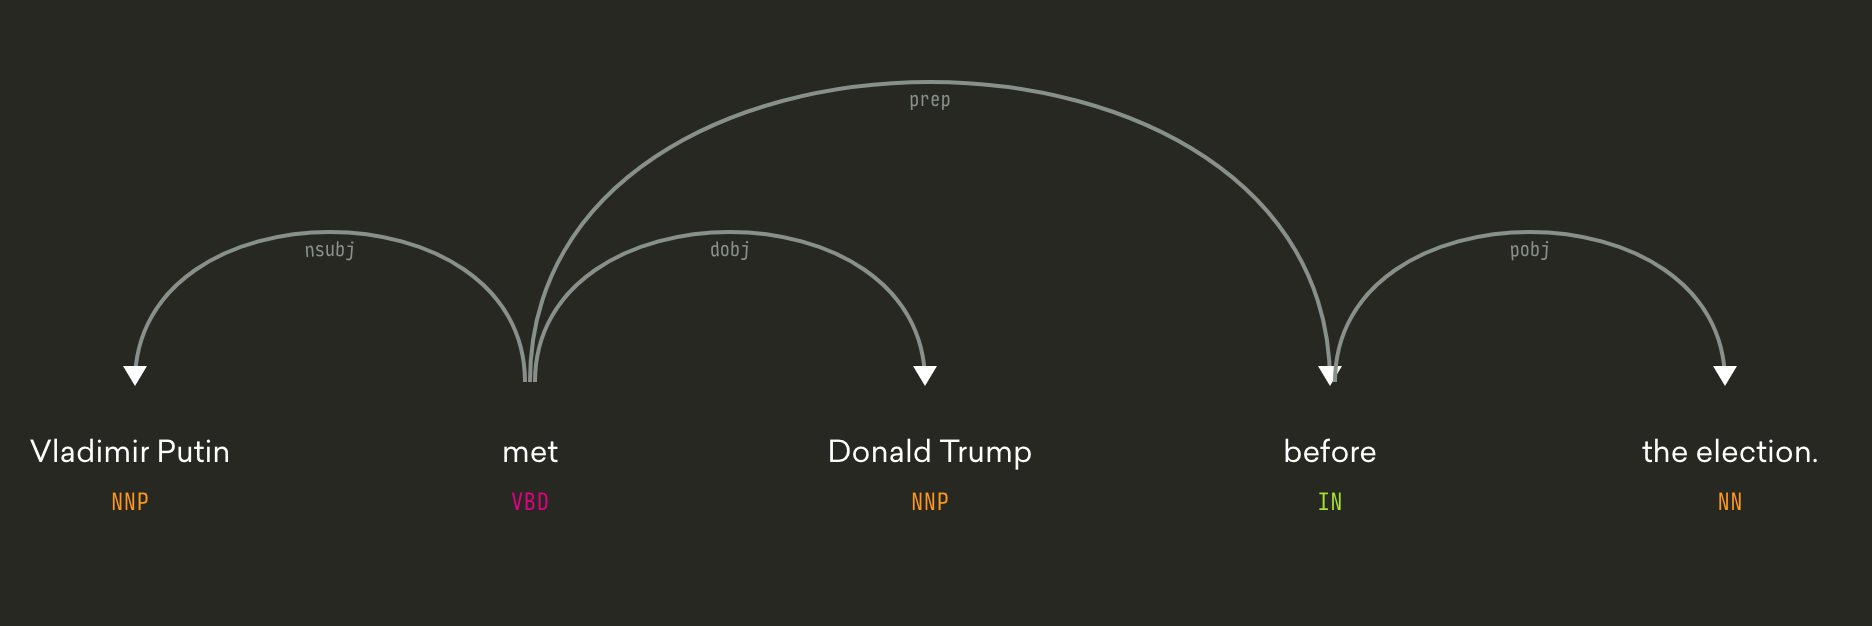

In [5]:
from IPython.display import Image
Image(filename='displacy.png')

Using Spacy we are able to tap into a named entity recognizer and pull these entities directly from sentences that we parse (minus stop-words), as shown below how the named entity recognizer works:

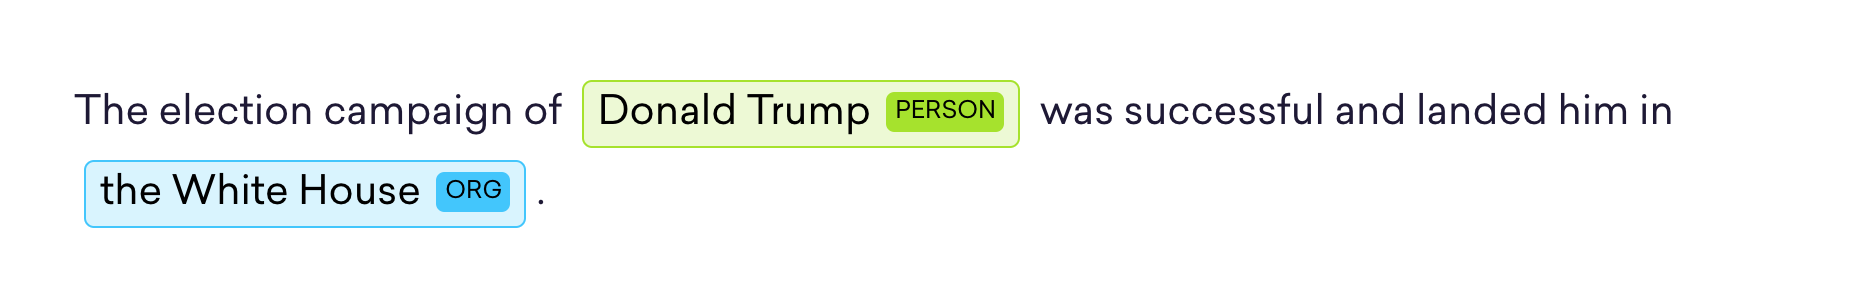

In [6]:
Image(filename='namedentities.png')

Taking the example of the topic 'Iraq', one would surmise that the noun Iraq would be the most important feature in an article to indicate the classifcation of the topic Iraq, however what if the article was pertaining to olympic athletes from multiple countries including Iraq, in this case the presence of the word Iraq would lead to a misclassification. Looking closer at an article you would find that in an article pertaining to Iraq, the presence of the word would most likely be more than once, unlike in an article about olympic athletes per se, thus the term frequency - inverse document frequency would play an important part, when for example the bulk of the articles have 5+ counts of the word Iraq and an article about olympic athletes would have only 1.

However the TF-IDF matrix cannot always differentiate by the counts alone, a model would need additional features to weigh against, for example using other nouns or entities associated with Iraq like Saddam Hussein or Baghdad or Mosul, you might start seeing vast improvements in your prediction, thus selecting the vocabulary is a very important part of our modelling process.

Manual edits and intuition go a long way in improving your predictive process, choosing another example such as 'australianguncontrol' you might find that using the phrase "australian gun" would be sufficient to predict a topic about Australian Gun Control but using the features "australia" and "gun" as separate features would result in lots of misclassifications due to there being plenty of other articles about Australia and guns not pertaining to this topic. 

However when you look at the phrase "australian gun", in our training set the three articles that we have do not even have phrase "australian gun" but contain the words "australia", "gun" and "australian", in this case we need to form a skipgram, i.e. a phrase that skips words between to form the phrase.

Using Spacy's tokenizer we would be able to find versions of combinations of words, taking the example before we could generate "australia gun", "australian gun", "australia guns", "australian guns" and other permutations, however due to the exponential scaling of these features and the computing difficulties in parsing multiple ngrams/skipgrams for each combination of words in an article, we have to manually limit this by putting our generated but manually edited vocabulary to ensure that processing the model for the topic does not take too long.

The aim is to create a vocabulary of terms, ngrams, skipgrams that are like a fingerprint of a topic. 

Our first step is to generate our vocabulary using Spacy and Counter.

#### Vocabulary Generating Functions:

Noun Chunks and Named Entities will be our focus for our vocabulary generation, we will edit our generated vocabulary after to filter out terms/phrases which are frequent across all topics and words that do not belong in the topic, regardless of being the most common in our article set from which we are generating these features.

We will be using the pipe function in Spacy that makes use of multi-threading to take advantage of all cores on the CPU to process the text and we will be using pickle to save the vocabulary at each step due to the processing time.

Spacy's parser comes with an inbuilt vocabulary function of 3 billion terms + and in creating noun chunks and entities, each of these come with a probability of being in the vocabulary, i.e. words like "he", "she", "the" would have very high probabilities, thus we choose the maximum non-likelihood of being in the vocabulary at -19.5.

The function will then be used in a for loop to generate a vocabulary dictionary by topic that will be plugged into our models.

#### Count Vectorizer N-Gram Generator:

In [16]:
# IMPORT COUNT VECTORIZER AND STOP WORDS AND COUNTER
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from collections import Counter

In [14]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
STOPLIST = set(stopwords.words('english') + ["n't", "'s", "'m", "ca"] + list(ENGLISH_STOP_WORDS))

In [23]:
# SET UP DICTIONARY TO BE USED FOR NGRAMS
topicvocab = {}
for topic in topics:
    topicvocab[topic] = []

In [24]:
# DEFINE NGRAM MAKER FUNCTION
def ngram_maker(topic):
    for i in (1, 2, 3, 4): # SPECIFY THE N-GRAM RANGE - UNI-GRAMS, BI-GRAMS, TRI-GRAMS, QUAD-GRAMS
        # A COUNT VECTORIZER WAS BUILT WITH THE SPECIFIC N-GRAM, WITH OUR CUSTOM STOP LIST.
        cv = CountVectorizer(ngram_range=(i,i), stop_words=STOPLIST, lowercase=True, strip_accents='unicode')
        # AN ANALYZER WAS BUILT USING THIS COUNT VECTORIZER
        analyzer = cv.build_analyzer()
        # A COUNTER WAS DEFINED TO COUNT OUR MOST COMMON N-GRAMS
        counter = Counter()
        
        for article in df[df[topic] == 1]['text']:
            articlengrams = analyzer(article)
            for term in articlengrams:
                counter[term] += 1
        if i == 1:
            for term in counter.most_common(30): # TOP 30 MOST COMMON UNI-GRAMS 
                topicvocab[topic].append(term[0])
        elif i == 2:
            for term in counter.most_common(30): # TOP 30 MOST COMMON BI-GRAMS
                topicvocab[topic].append(term[0])
        elif i == 3:
            for term in counter.most_common(10): # TOP 10 MOST COMMON TRI-GRAMS
                topicvocab[topic].append(term[0]) 
        elif i == 4:
            for term in counter.most_common(10): # TOP 10 MOST COMMON QUAD-GRAMS
                topicvocab[topic].append(term[0])
    return topicvocab[topic] # N-GRAMS GENERATED FROM THE COUNT VECTORIZER WOULD BE SAVED INTO A TOPIC-VOCAB DICTIONARY

In [25]:
# SAMPLE N-GRAMS GENERATED FROM OUR MOST COMMON N-GRAMS FROM ARTICLES IN OUR AFGHANISTAN TOPIC ARTICLES
ngram_maker('afghanistan')

[u'afghanistan',
 u'said',
 u'taliban',
 u'afghan',
 u'war',
 u'government',
 u'country',
 u'military',
 u'year',
 u'people',
 u'women',
 u'security',
 u'years',
 u'forces',
 u'british',
 u'new',
 u'world',
 u'election',
 u'time',
 u'president',
 u'karzai',
 u'kabul',
 u'pakistan',
 u'troops',
 u'international',
 u'foreign',
 u'says',
 u'army',
 u'killed',
 u'abdullah',
 u'hamid karzai',
 u'human rights',
 u'year old',
 u'security forces',
 u'women rights',
 u'ashraf ghani',
 u'united states',
 u'al qaida',
 u'years ago',
 u'long term',
 u'abdullah abdullah',
 u'international community',
 u'armed forces',
 u'white house',
 u'president hamid',
 u'barack obama',
 u'foreign policy',
 u'afghan government',
 u'presidential election',
 u'national security',
 u'british forces',
 u'civil war',
 u'new president',
 u'iraq afghanistan',
 u'world war',
 u'prime minister',
 u'end year',
 u'second round',
 u'guantanamo bay',
 u'helmand province',
 u'president hamid karzai',
 u'afghan security forces

#### Spacy Noun Chunks and Named Entities Generator:

In [27]:
# IMPORT SPACY
from spacy.en import English
parser = English()

In [30]:
# DEFINE VOCABMAKER FUNCTION
def vocabmaker(topic, df):
    # CREATE A VOCABULARY LIST
    vocabulary = []
    
    # CREATE A NEW DATAFRAME FOR TOPIC TEXT
    topicdf = df[df[topic] == 1]['text']
    topicdf.reset_index(drop=True, inplace=True)
    
    # USE SPACY TO CREATE VOCAB WITH COUNTER
    nouns = Counter()
    entities = Counter()
    
    # CREATES A PARSER PIPE
    for doc in parser.pipe(topicdf, n_threads=16, batch_size=10000):
        for chunk in doc.noun_chunks:
            if parser.vocab[chunk.lemma_].prob < -19.5:
                    nouns[chunk.lemma_] += 1
        for entity in doc.ents:
            if parser.vocab[entity.lemma_].prob < -19.5:
                    entities[entity.lemma_] += 1

    # APPEND NOUNS AND ENTITIES TO VOCAB
    for noun, count in nouns.most_common(20):
        vocabulary.append(noun)
    
    for entity, count in entities.most_common(20):
        vocabulary.append(entity)
        
    vocabulary = list(set(vocabulary))
    
    if vocabulary == set():
        vocabulary = []
        
    return vocabulary

In [32]:
# SAMPLE
vocabmaker('afghanistan', df)

[u'the army',
 u'pakistan',
 u'hamid karzai',
 u'washington',
 u'britain',
 u'-PRON-',
 u'afghanistan',
 u'afghan',
 u'abdullah',
 u'the election',
 u'kabul',
 u'the world',
 u'helmand',
 u'nato',
 u'pakistani',
 u'the government',
 u'the end',
 u'ghani',
 u'the us',
 u'afghans',
 u'taliban',
 u'bergdahl',
 u'the attack',
 u'iraq',
 u'the war',
 u'the taliban',
 u'karzai',
 u'british',
 u'uk',
 u'syria',
 u'the country']

There is a large overlap between the vocabulary generated by the two different functions, but ideally one needs to take the most unique elements relating to the topics from each of these functions, I created a set from this vocabulary functions generated to use in my fitted vocabulary later on.

#### _A fitted vocabulary is in essence a form of principal component analysis in the case of text classification as you are limited by hand, components that one thinks are most useful in predicting a classification._

# Modelling:

Before fitting any vocabulary to my models, I first made sureFor topic classification, a variety of methods are available but as we are focused mainly on three methods - Support Vector Classifiers, Logistic Regression for a baseline and Naive Bayes. Naive Bayes and Support Vector Machines are widely regarded in natural language processing as the best models for text classification as such I focused on these three due to the time constraints of running multiple models for large number of topics.

### Modelling Breakdown

In running my model, I had to run multiple steps in the pipeline for each topic:

- Count Vectorizer: 

Takes each individual or specified n-gram in the article and returned a count.

- TF-IDF Transformer: 

Returns the term frequency - inverse document frequency matrix, i.e. returns a value of how important a word is in the article. There were many parameters here to be adjusted depending on whether we required sublinear-tf scaling - i.e. adjusting the weight of terms that occur frequently to lose importance after occurring a certain number of times.

- Standard Scaler

Standardizing the count vectorized, term frequency - inverse document frequency is necessary so that the terms are all on the same scale.

- Model

Plug in the model with regularization parameters to tone down non-impactful features.

#### Gridsearch:

In addition to the pipeline mentioned above, we fit our gridsearch with parameters that we wanted to find the most ideal for each topic, as it would be time consuming to individually adjust each of the topics models, a gridsearch would find for example whether a binary count vectorizer produces the most accurate F1 score or figures out which regularization C or penlty to use for certain topics, for example with a topic like "aid" which could relate to many other topics in the presence of certain words or phrases, a stronger regularization is required as well as a non-binary Count Vectorizer with sub-linear TF and norm.

#### Pickling:

I used pickles as well to save the results of each model to a file that could ensure reproducibility for the models depending on the scores generated. 

#### Train Test and Hold out Data:

A train and test split was used to used to test for an f1 score on the training data itself and our unlabeled test data predictions was generated using the grid search best estimator.

#### Sample Model

In [34]:
parameters = {
    'tfidf__norm': ('l2', 'l1'),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (0.1, 1, 100),
}

clf = LogisticRegression()

In [35]:
time1 = time.time()

for topic in topics:
    # CERTAIN TOPICS SUCH AS UNLABELED TOPICS WERE REMOVED FROM THE LOOP AS THEY WERE MODELLED IN ANOTHER NOTEBOOK
    if topic in topics_0:
        submission[topic] = 0
    else:
        X, y = sampler(topic, df)
        
        #N-GRAM RANGE OF (1,2)
        vectorizer = CountVectorizer(ngram_range=(1,4),
                                     max_df=0.25,
                                     binary=False,
                                     lowercase=True,
                                     vocabulary=vocab[topic],
                                     stop_words=STOPLIST, 
                                     strip_accents='unicode')

        # PIPELINE OF VECTORIZER, TF-IDF TRANSFORMER, STANDARD SCALER, MODEL
        pipe = Pipeline([('vectorizer', vectorizer), 
                 ('tfidf', TfidfTransformer(sublinear_tf=True, smooth_idf=True, use_idf=True)),
                 ('ss', StandardScaler(with_mean=False)),
                 ('clf', clf)])
        
        pipe.fit(X, y)

        # GRIDSEARCH PIPELINE FIT
        grid_search = GridSearchCV(pipe, parameters, n_jobs=-1, verbose=1, scoring='f1')
        grid_search.fit(X, y)

        # PREDICTION SCORE
        print topic, "F1 Score", grid_search.best_score_
        print "Grid Search Best Params:", grid_search.best_params_
        
        # PICKLE GRID SEARCH BEST PARAMETERS
        with open('Pickles/gridsearch_logreg'+str(topic)+'.pickle', 'wb') as handle:
            pickle.dump(grid_search.best_estimator_, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
        print("----------------------------------------------------------------------------------------------")
        print("Top 10 features used to predict: ")
        printNMostInformative(topic, vectorizer, clf, 10)
        
        # FINAL PREDICTIONS
        preds_final = grid_search.best_estimator_.predict(testdf['text'])

        # WRITE TO CSV
        submission[topic] = preds_final
        print "Number of topics", topic, "predicted:", submission[topic].sum()
        
    submission.to_csv('LogReg_VocabFitted.csv')
    print topic
    
time2 = time.time()
time_in_s = (time2-time1) 
print 'Function takes around %0.3f seconds to run' % (time_in_s)

### Evaluation Metric:

The evaluation metric for the models was the F1-score, the goal being to generate the highest possible micro-averaged f1-score over all 160 topics. However due to the fact that the real test data was unlabeled, F1 score on our training set was not the only important metric I looked at in evaluating whether the model was predicting well. I used a function that that would generate the weights for the features, when vocabulary wasn't fitted this was much more important as you would see whether relevant n-grams were being generated as top predictors and with vocabulary fitted, it was important also to see whether the model was indeed identifying those features or whether there were data issues with the train-test split such that some features were not being used in the training of those models.

In [36]:
def printNMostInformative(topic, vectorizer, clf, N):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Strongest Features: ")
    for feat in topClass2:
        print(feat)

## Unlabeled Topics:

For unlabeled topics, I decided to use a dataset available on Harvard Datasets, whilst not all of the unlabeled topics were represented in the dataset I used, most had articles that were sufficiently representative of the unlabeled topics that I was able to train a simplistic using a binary Count Vectorizer with vocabulary inputted. 

For topics that did not have representative articles, I created dummy articles with phrases in the dummy articles and trained a binary Count Vectorizer to predict, in the case of most of the unlabeled topics, a binary Count Vectorizer was more than sufficient to predict, for example the presence of the bigram "zika virus" was sufficient to predict an article that was topic classified as Zika virus more than 90% of the time, whereas a topic like "values" would be much harder to predict due to the commonality of a phrase like "values" and a binary count vectorizer was not sufficient in predictive power due to the large false positive predictions generated, hence more research needed to be done and finding the right data to predict this topic was important.

Link to [Classifying Unlabeled Topics](UnlabeledTopics.ipynb)

## Modeling Notebooks:

Due to the large size of the notebooks and coefficients generated from over 140 models, the various modelling notebooks are linked to below:

Link to [Logistic Regression - N-Gram Range (1,1) - Trained on Full Data](Model_2.ipynb)

Link to [Multinomial Naive Bayes Regression - N-Gram Range (1,2) - Trained on Full Data](Model_2.ipynb)

Link to [Linear Support Vector Classifier - N-Gram Range (1,2) - Trained on 2014 Data](Model_2.ipynb)

Link to [Logistic Regression - N-Gram Range (1,2) - Trained on 2014 Data](Model_2.ipynb)

Link to [Logistic Regression - N-Gram Range (1,2) - Custom Spacy Tokenizer - Trained on 2014 Data](Model_2.ipynb)

# Evaluating the Models on F1 score on the Test:

From implementing Naive-Bayes and Linear SVC and Logistic Regression, to my surprise I was generating the best results from a logistic regression. Over the course of 20 submissions I was able to improve from a starting F1-score of 0.02 which was just completely random samples, to 0.4283, placing in the top 10% of entries for the challenge with the highest being 0.67. It was worth noting that whilst my F1-scores were improving on the training data massively, I was causing the model to over fit, whilst generating f1-scores over 0.9 average, the final model with fitted vocabulary had lower f1-scores on average due to insufficient features in the vocabulary but still generated the highest f1-score on the real unseen test data.

The final model was a logistic regression with fitted vocabulary, however limited in the number of features, I believe certain topics required more and others less. Overall I believe the methodology of a fitted Count Vectorizer to be correct but more time and individual tuning was necessary for the topics. 

I believe that this could have resulted in a much higher score, if topics were binned appropriately and unlabeled topics like "values" were not submitted due to the lack of any corresponding article or descriptory n-grams.

## Putting into Production:

As my models have already been pickled for reproducibility, it would be rather simple to put this into production using Flask and plugging in the pickled GridSearched models and using a webpage with an input for one to paste an article into and to predict a classification for a topic. 

# Conclusions

Overall the challenge enabled me to tackle the processes involved with handling big data, natural language processing and machine learning models and taught me a lot about the fundamentals of tackling challenges with large volumes of data and huge numbers of classifications.

Ideally in the future I would like to implement an unsupervised learning element as well for unlabeled topics using clustering, elements of latent dirichlet allocation, whereas I was using only elements of Latent Semantic Analysis with the standard bag of words and word2vec methodology in text classification. 